In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_parquet("../data/raw/puc_vendas.parquet")
df.head()

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,782344,55750557.0,Pessoa Física,F,1980-11-18,10085918,VONAU FLASH 4MG 10CP,MEDICAMENTOS,REFERENCIA,764,RS,80400,PORTO ALEGRE,2024-04-11 17:13:25,1.0,NaN,47.03,12.70,47.03,34.33
1,759507,55750557.0,Pessoa Física,F,1980-11-18,10106687,APTANUTRI PREMIUM 3,NUTRICAO,NUTRICAO LEITES,764,RS,80400,PORTO ALEGRE,2024-02-19 15:47:17,1.0,NaN,73.99,14.80,73.99,59.19
2,742082,55750557.0,Pessoa Física,F,1980-11-18,10037705,TORRADA ISABELA 142G TRADICIONAL,CONVENIENCIA,CONVENIENCIA PERECIVEIS,764,RS,80400,PORTO ALEGRE,2024-01-05 19:48:52,1.0,NaN,5.99,0.00,5.99,5.99
3,747733,55750557.0,Pessoa Física,F,1980-11-18,10004419,OZEMPIC 1MG 4AGULHAS NOVOFINE,MEDICAMENTOS,PBM ESPECIAL,764,RS,80400,PORTO ALEGRE,2024-01-20 14:41:56,1.0,NaN,1220.52,254.37,1220.52,966.15
4,748216,55750557.0,Pessoa Física,F,1980-11-18,10030435,NOVALGINA 1G 20CP OPELLA,MEDICAMENTOS,REFERENCIA ONEROSOS,764,RS,80400,PORTO ALEGRE,2024-01-22 16:48:36,1.0,100271131.0,41.51,5.52,41.51,35.99


In [3]:
products = df.groupby(["COD_SKU", "SKU", "CATEGORIA_SKU", "SUBCATEGORIA_SKU"])["PRECO_REGULAR"].mean().reset_index()
products["PRECO_REGULAR"] = products["PRECO_REGULAR"].round(2)
products = products.rename(
    columns={
        "COD_SKU": "product_id",
        "SKU": "product_name",
        "CATEGORIA_SKU": "category",
        "SUBCATEGORIA_SKU": "subcategory",
        "PRECO_REGULAR": "price"
    }
)
products.head()

,product_id,product_name,category,subcategory,price
0,7,SERVICO EM DOMICILIO,DIVERSOS,SERVICOS TELE ENTREGA,5.00
1,10,MANIPULADOS,MANIPULADOS,MANIPULADOS MEDICAMENTOS,0.01
2,11,SERVICO DE APLICACAO DE INJETAVEIS,SERVIÇOS,SERVICOS FARMACEUTICOS,5.00
3,12,SERVICO DE GESTO VACINAL GRIPE CONVENIOS,SERVIÇOS,SERVICOS FARMACEUTICOS,7.98
4,13,SERVICO DE VERIFICACAO DE GLICEMIA CAPIL,SERVIÇOS,SERVICOS FARMACEUTICOS,3.00


In [4]:
# print all duplicated products
products.duplicated().sum()

np.int64(0)

In [5]:
products.duplicated(subset=["product_id"]).sum()

np.int64(0)

In [6]:
products.duplicated(subset=["product_name"]).sum()

np.int64(2507)

In [7]:
products[products.duplicated(subset=["product_name"], keep=False)].sort_values("product_name").head(30)

,product_id,product_name,category,subcategory,price
15980,10090807,"ABLOK PLUS 25/12,5MG",MEDICAMENTOS,REFERENCIA,24.68
18500,100010705,"ABLOK PLUS 25/12,5MG",MEDICAMENTOS,REFERENCIA,49.21
5757,10021193,ABS INTIMUS DIA&NOIT,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,33.99
5758,10021194,ABS INTIMUS DIA&NOIT,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,19.99
17499,100000682,ABS INTIMUS GEL SECA,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,13.31
16924,10102584,ABS INTIMUS GEL SECA,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,24.28
718,6087,ABS INTIMUS GEL SECA,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,7.66
234,1338,ABS INTIMUS GEL SUAV,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,7.70
17500,100000683,ABS INTIMUS GEL SUAV,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,13.27
16925,10102585,ABS INTIMUS GEL SUAV,PERFUMARIA,ABSORVENTES E LENÇOS SUBSTITUIDO,24.33


In [8]:
print(products.shape)
products.drop_duplicates(subset=["product_name", "category", "subcategory"], keep="first", inplace=True)
print(products.shape)

(20658, 5)
(18253, 5)


In [9]:
len(products["category"].unique())

9

In [10]:
len(products["subcategory"].unique())

80

In [11]:
products.head()

,product_id,product_name,category,subcategory,price
0,7,SERVICO EM DOMICILIO,DIVERSOS,SERVICOS TELE ENTREGA,5.00
1,10,MANIPULADOS,MANIPULADOS,MANIPULADOS MEDICAMENTOS,0.01
2,11,SERVICO DE APLICACAO DE INJETAVEIS,SERVIÇOS,SERVICOS FARMACEUTICOS,5.00
3,12,SERVICO DE GESTO VACINAL GRIPE CONVENIOS,SERVIÇOS,SERVICOS FARMACEUTICOS,7.98
4,13,SERVICO DE VERIFICACAO DE GLICEMIA CAPIL,SERVIÇOS,SERVICOS FARMACEUTICOS,3.00


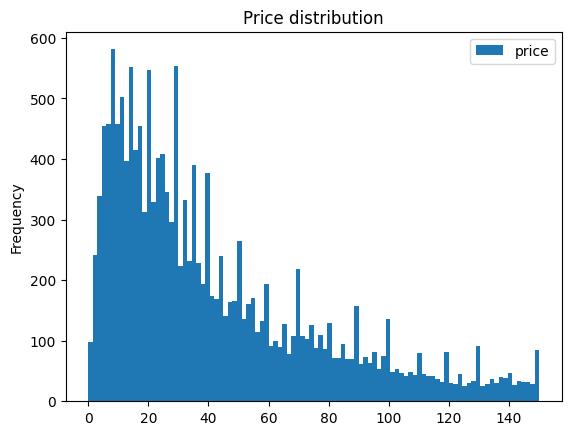

In [12]:
products[products.price < 150].plot(y='price', kind='hist', bins=100, title='Price distribution');

In [13]:
print("mean price:",products.price.mean())
print("median price:",products.price.median())
print("max price:",products.price.max())
print("min price:",products.price.min())

mean price: 92.486938585438
median price: 34.99
max price: 55243.29
min price: 0.01


In [14]:
products[products.price > 1000]

,product_id,product_name,category,subcategory,price
1482,93173,"ZOLADEX LA 10,8MG INJ ASTRAZENECA",MEDICAMENTOS,REFERENCIA ESPECIAL,3202.03
1939,999702,ARIMIDEX 1MG 28CAP ASTRAZENECA,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,1367.45
1940,999705,"ZOLADEX 3,6MG DEPOT INJ ASTRAZENECA",MEDICAMENTOS,REFERENCIA ESPECIAL,1281.11
1976,1000180,GEODON 80MG 30CP PFI,MEDICAMENTOS,REFERENCIA ONEROSO CONTROLADO,1051.03
2286,1004813,"EPREX 4000UI 0,4ML I",MEDICAMENTOS,REFERENCIA ESPECIAL,1362.70
...,...,...,...,...,...
19366,100017576,RILUZOL 50MG 56CP GE,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,2148.15
19663,100020333,ZYPREXA 10MG 30CP RE,MEDICAMENTOS,PBMS CONTROLADOS,1712.54
19666,100020343,KEYTRUDA 100MG/4ML SOL INJ MS,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,25624.98
19731,100020631,IMPLANON ETONOGESTREL NXT 68MG 1APL/IMPL,MEDICAMENTOS,REFERENCIA ESPECIAL,1108.93


In [15]:
products[products.price < 3]

,product_id,product_name,category,subcategory,price
1,10,MANIPULADOS,MANIPULADOS,MANIPULADOS MEDICAMENTOS,0.01
6,15,SERVICO DE VERIFICACAO DA PRESSAO ARTERI,SERVIÇOS,SERVICOS FARMACEUTICOS,1.81
12,36,VERIFICACAO DA TEMPERATURA CORPORAL,SERVIÇOS,SERVICOS FARMACEUTICOS,0.01
13,37,SERVICO DE APLICACAO DE INJETAVEIS (CORT,SERVIÇOS,SERVICOS FARMACEUTICOS,0.01
14,38,SERVICO DE MEDIDA DE GLICEMIA CAPILAR (C,SERVIÇOS,SERVICOS FARMACEUTICOS,0.01
...,...,...,...,...,...
20490,100027203,SACOLA PRESENTE P AZ,CONVENIENCIA,CONVENIENCIA BAZAR,1.81
20491,100027204,SACOLA PRESENTE P LI,CONVENIENCIA,CONVENIENCIA BAZAR,1.84
20492,100027229,LACO PRONTO PRESENTE PREMIUM,CONVENIENCIA,CONVENIENCIA BAZAR,1.50
20493,100027230,SACO PRESENTE REVAL 30X45 P INFANTIL,CONVENIENCIA,CONVENIENCIA BAZAR,1.20


In [16]:
products[products.price > 40000]

,product_id,product_name,category,subcategory,price
3378,10003080,OCREVUS 30MG SOL DIL INFUS IV AMP 10ML R,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,55243.29
10863,10032258,VYNDAQEL 20MG 30CAP PFIZER,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,40537.40
11566,10033470,DALINVI 1800MG SOL INJ FR15ML JANSSEN,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,44299.50
14870,10038709,KOSELUGO 10MG 60CAP ASTRAZENECA,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,48771.75
19186,100015357,JAKAVI 20MG 60CP REV,MEDICAMENTOS,REFERENCIA ESPECIAL ONEROSO,43063.59


In [17]:
products.to_parquet("../data/cleaned/products.parquet")

**Perguntas Importantes**:
- Vale a pena manter os produtos absurdamente caros? (eu olhei e eles estao corretos, sao remedios pra cancer e outras doencas muito dificeis de tratar)
- Vale a pena manter os "produtos" absurdamente baratos? (alguns deles sao: entrega do medicamento em casa, sacola plastica, medicao de temperatura corporal e etc...)
- Existiam produtos com ids diferentes e precos diferentes, mas com o mesmo nome, categoria e sub-categoria. Eu dropei. Mantenho assim? 